In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [5]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

578

## Perform API Calls

In [6]:
# OpenWeatherMap API Key
# api_key = api_keys.api_key

# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key + "&q="

In [7]:
# List for holding lat_temp and cities
lat = []
temp = []
humidity = []
clouds = []
wind = []
date = []

# Identify nearest city for each lat, lng combination
for city in cities:
    try:
        response = requests.get(url + city).json()
        lat.append(response['coord']['lat'])
        temp.append(response['main']['temp'])
        humidity.append(response['main']['humidity'])
        clouds.append(response['clouds']['all'])
        wind.append(response['wind']['speed'])
        date.append(response["dt"])
    except:
        "Null"
    
#print(f"The latitude information received is: {lat}")
#print(f"The temperature information received is: {temp}")

In [13]:
# Make a request for each of the indices
# for city in cities:
#     print(f"Making request number: {url}")

In [27]:
# create a data frame from cities, lat, temp, humidity, cloud, wind, date
data = ({
    "city": cities,
    "lat": lat,
    "temp": temp,
    "humidity": humidity,
    "clouds": clouds,
    "wind": wind,
    "date": date})
data_df = pd.DataFrame.from_dict(data, orient='index')
data_df = data_df.transpose()
data_df = data_df.dropna()
data_df.to_csv("city_info.csv")
data_df = pd.DataFrame(data_df)
data_df.head()

,city,lat,temp,humidity,clouds,wind,date
0,ribeira grande,38.52,75.27,96,88,9.51,1538096114
1,rikitea,-23.12,72.21,100,76,15.77,1538096114
2,esperance,10.24,75.2,94,20,4.59,1538092800
3,amderma,-34.42,57.27,93,92,11.41,1538096115
4,hermanus,-53.16,41.85,60,0,5.82,1538092800


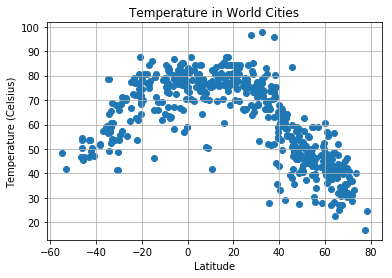

In [28]:
# Build a scatter plot for each data type
plt.scatter(weather_dict["lat"], weather_dict["temp"], marker="o")

# Incorporate the other graph properties
plt.title("Temperature in World Cities")
plt.ylabel("Temperature (Celsius)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("TemperatureInWorldCities.png")

# Show plot
plt.show()

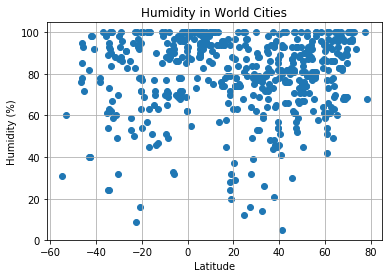

In [29]:
# Build a scatter plot for each data type
plt.scatter(weather_dict["lat"], weather_dict["humidity"], marker="o")

# Incorporate the other graph properties
plt.title("Humidity in World Cities")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("HumidityInWorldCities.png")

# Show plot
plt.show()

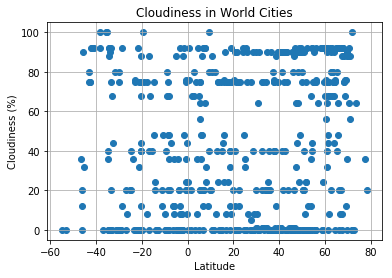

In [30]:
# Build a scatter plot for each data type
plt.scatter(weather_dict["lat"], weather_dict["clouds"], marker="o")

# Incorporate the other graph properties
plt.title("Cloudiness in World Cities")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("CloudinessInWorldCities.png")

# Show plot
plt.show()

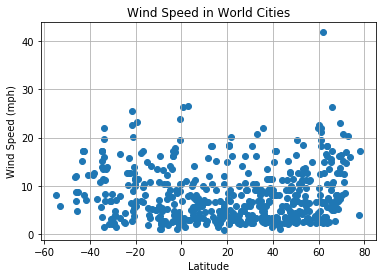

In [31]:
# Build a scatter plot for each data type
plt.scatter(weather_dict["lat"], weather_dict["wind"], marker="o")

# Incorporate the other graph properties
plt.title("Wind Speed in World Cities")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("WindspeedInWorldCities.png")

# Show plot
plt.show()